<a href="https://colab.research.google.com/github/verneh/opencv/blob/main/manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

## Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Augmentation

link to understanding: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generation

more techniques. https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

shearing tutorial.
https://stackoverflow.com/questions/47826730/how-to-save-resized-images-using-imagedatagenerator-and-flow-from-directory-in-k

In [18]:
def show_image(iterator):
    # generate samples and plot
    for i in range(9):
        plt.subplot(330 + 1 + i)
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
    plt.show()

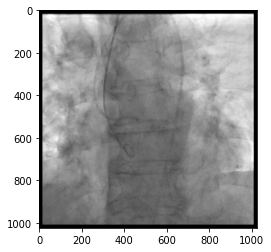

In [19]:
# load and display the original image
# path = '/content/drive/MyDrive/ImageDataGenerator/antibes.jpg' 
path = '/content/drive/MyDrive/ImageDataGenerator/81.jpg'
img = cv.imread(path) 
plt.imshow (img) 

## Types of Preprocessing

In [31]:
# read image
data = img_to_array(img) 
samples = np.expand_dims(data, 0)

In [ ]:
# shear_range -> 
s_gen = ImageDataGenerator(shear_range = 15)
iterator = s_gen.flow(samples, batch_size=1)

In [74]:
# rotation range 
r_gen = ImageDataGenerator(rotation_range = 5, fill_mode='nearest', zoom_range = [0.5,1.0], width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1)
iterator = r_gen.flow(samples, batch_size=1)

In [58]:
# zoom range 
z_gen = ImageDataGenerator(zoom_range = [0.5,1.0])
iterator = z_gen.flow(samples, batch_size=1)

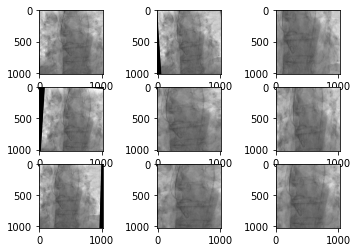

In [75]:
# display subplot images
show_image(iterator)

In [76]:
# pick place to save
save_test = '/content/drive/MyDrive/ImageDataGenerator/resized'

In [77]:
r_gen.fit(samples)

In [78]:
# loop to produce jpg files
for x, val in zip(r_gen.flow(samples, # our image
        save_to_dir=save_test,          # where we save the files
        save_prefix='81r',              # it will save the images as 'aug_0912' or some number for every new augmented image
        save_format='jpg'),range(11)):
  pass     # here we define a range because we want 10 augmented images otherwise it will keep looping forever.
